### CPEB4 setup
We wish to explore some initial results on CPEB4. For it we ran some "normal" RE simulations, along with eps=10 RE simulations with varying hydrophobic strength in both cases.

In [19]:
import os
import sys
import importlib
import matplotlib.pyplot as plt
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import numpy as np

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);

In [4]:
cpeb4 = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'

We set up the "normal" reference RE using my scripts. **The results for a varying scaling of the hydrophobicity and I = 100 are** :

In [5]:
ds = ['/home/adria/perdiux/prod/lammps/dignon/CPEB4/0.55-lS-cpeb4',
      '/home/adria/perdiux/prod/lammps/dignon/CPEB4/0.70-lS-cpeb4',
      '/home/adria/perdiux/prod/lammps/dignon/CPEB4/0.85-lS-cpeb4',
      '/home/adria/perdiux/prod/lammps/dignon/CPEB4/RE-cpeb4',]
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]
scales = [0.55, 0.70, 0.85, 1.00]
rgs = []
florys = []
dis = []
ms = []

for d in ds:
    re = analysis.Analysis(oliba_wd=d, temper=True)
    rgs.append(re.rg(use='md'))
    florys.append(re.flory_scaling_fit(r0=5.5, use='md')[0])
    ijs, means = re.ij_from_contacts(use='md')
    ms.append(means)
    dis.append(ijs)

Omitting temper reordering (reorder files already present)
==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
Omitting temper reordering (reorder files already present)
==================== CONTACT MAP CALCULATION FINISHED ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================
==================== FLORY EXPONENT CALCULATION FINISHED ====================
==================== Calculating ij from contact map using md ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================
Omitting temper reordering (reorder files already present)
==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using 

The **Rg** are :

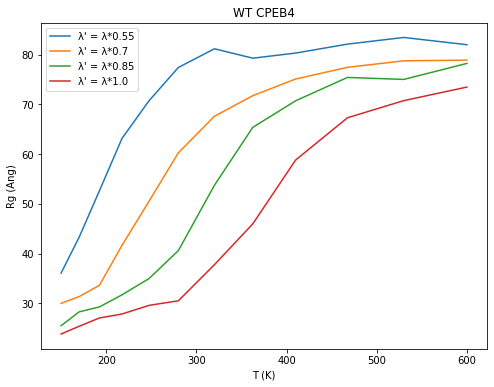

In [7]:
plt.figure(figsize=(8,6))
plt.xlabel("T (K)")
plt.title("WT CPEB4")
plt.ylabel("Rg (Ang)")
for i in range(len(rgs)):
    plt.plot(Ts, rgs[i].mean(axis=1), label=f'\u03BB\' = \u03BB*{scales[i]}')
plt.legend();

The **flory** scaling exponents are :

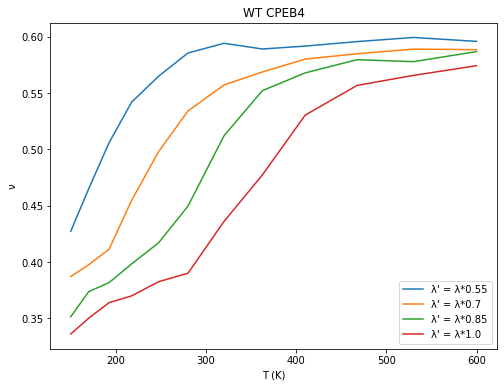

In [10]:
plt.figure(figsize=(8,6))
plt.xlabel("T (K)")
plt.ylabel("ν")
plt.title("WT CPEB4")
npflorys = np.array(florys)
for i in range(len(florys)):
    plt.plot(Ts, npflorys[i], label=f'\u03BB\' = \u03BB*{scales[i]}')
plt.legend();

In case we want to to d_ijs also we can run this :

In [ ]:
npdis = np.array(dis)
npms = np.array(ms)
npflorys = np.array(florys)
for i in range(len(ds)):
    fig = plt.figure(figsize=(8, 6))
    plt.ylabel("d_ij")
    plt.xlabel("|i-j|")
    plt.title("WT CPEB4")
    for T in range(len(Ts)):
        plt.plot(npdis[i,T], npms[i,T], label=Ts[T])
    plt.legend()

Epsilon_r = 10 results

In [24]:
base_dir = '/home/adria/perdiux/prod/lammps/dignon/CPEB4/eps'
dirs100 = [
    '0.55l-100I-CPEB4',
    '0.7l-100I-CPEB4',
    '0.85l-100I-CPEB4',
    '1.0l-100I-CPEB4',
]

dirs10 = [
    '0.55l-10I-CPEB4',
    '0.7l-10I-CPEB4',
    '0.85l-10I-CPEB4',
    '1.0l-10I-CPEB4',
]

florys100 = []
rgs100 = []

florys10=[]
rgs10 = []
for d in dirs100:
    re = analysis.Analysis(oliba_wd = os.path.join(base_dir,d), temper=True)
    florys100.append(re.flory_scaling_fit(r0=5.5, use='md'))
    rgs100.append(re.rg(use='md'))
    
for d in dirs10:
    re = analysis.Analysis(oliba_wd = os.path.join(base_dir,d), temper=True)
    florys10.append(re.flory_scaling_fit(r0=5.5, use='md'))
    rgs10.append(re.rg(use='md'))

==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
Omitting temper reordering (reorder files already present)
==================== CONTACT MAP CALCULATION FINISHED ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================
==================== FLORY EXPONENT CALCULATION FINISHED ====================
Omitting temper reordering (reorder files already present)
==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
Omitting temper reordering (reorder files already present)
==================== CONTACT MAP CALCULATION FINISHED ===============

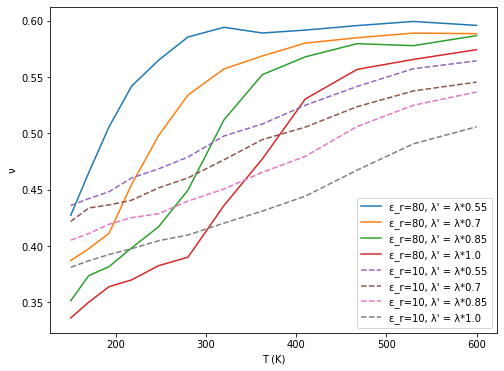

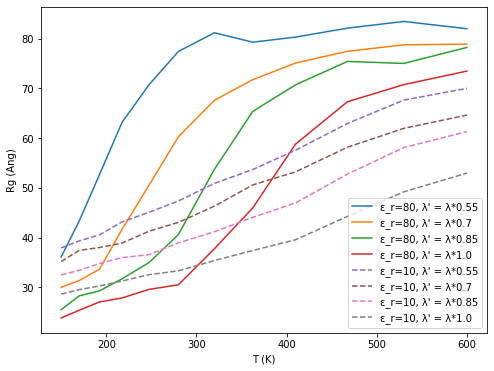

In [57]:
plt.figure(figsize=(8,6))
plt.xlabel("T (K)")
plt.ylabel("ν")

for i in range(len(florys)):
    plt.plot(Ts, npflorys[i], label=f'\u03B5_r=80, \u03BB\' = \u03BB*{scales[i]}')
for i, fl100 in enumerate(florys100):
    plt.plot(Ts, fl100[0],'--', label=f'\u03B5_r=10, \u03BB\' = \u03BB*{scales[i]}')

plt.legend()

plt.figure(figsize=(8,6))

plt.xlabel("T (K)")
plt.ylabel("Rg (Ang)")

    
for i in range(len(rgs)):
    plt.plot(Ts, rgs[i].mean(axis=1), label=f'\u03B5_r=80, \u03BB\' = \u03BB*{scales[i]}')
for i, rg100 in enumerate(rgs100):
    plt.plot(Ts, rg100.mean(axis=1), '--', label=f'\u03B5_r=10, \u03BB\' = \u03BB*{scales[i]}')
plt.legend();

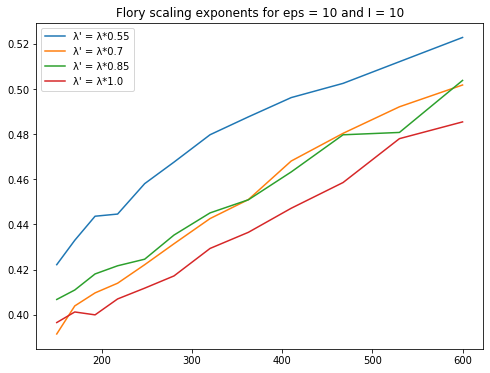

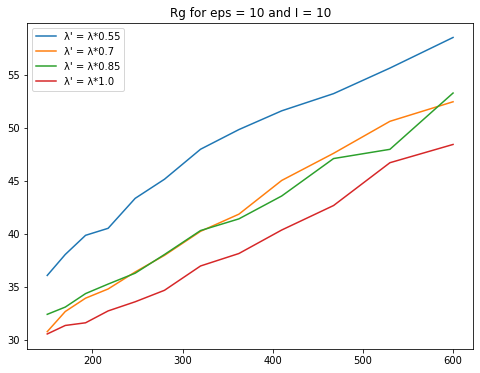

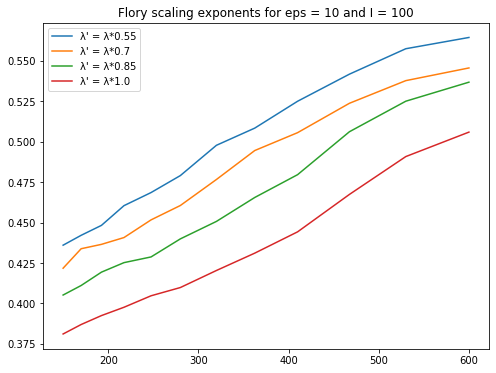

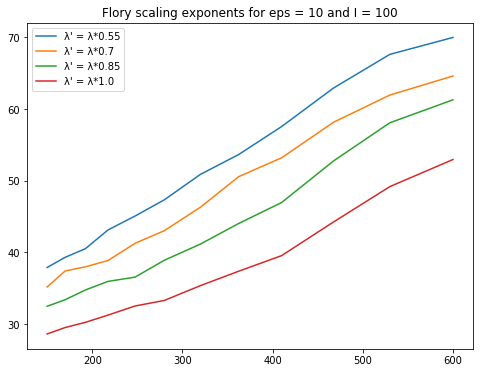

In [34]:
lscales = [0.55,0.7, 0.85, 1.0]
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]
plt.figure(figsize=(8,6))
plt.title("Flory scaling exponents for eps = 10 and I = 10")
for i, fl10 in enumerate(florys10):
    plt.plot(Ts, fl10[0], label=f'\u03BB\' = \u03BB*{scales[i]}')
plt.legend()

plt.figure(figsize=(8,6))
plt.title("Rg for eps = 10 and I = 10")
for i, rg10 in enumerate(rgs10):
    plt.plot(Ts, rg10.mean(axis=1), label=f'\u03BB\' = \u03BB*{scales[i]}')
plt.legend()
    
plt.figure(figsize=(8,6))
plt.title("Flory scaling exponents for eps = 10 and I = 100")
for i, fl100 in enumerate(florys100):
    plt.plot(Ts, fl100[0], label=f'\u03BB\' = \u03BB*{scales[i]}')
plt.legend()

plt.figure(figsize=(8,6))
plt.title("Rg for eps = 10 and I = 100")
for i, rg100 in enumerate(rgs100):
    plt.plot(Ts, rg100.mean(axis=1), label=f'\u03BB\' = \u03BB*{scales[i]}')
plt.legend()


Normal runs at I=100 and I=10

In [40]:
I100 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4/RE-cpeb4', temper=True)
I10 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4/RE_I_CPEB4/400I/1.0l-CPEB4', temper=True)

rg10 = I10.rg(use='md')
rg100 = I100.rg(use='md')
flory10 = I10.flory_scaling_fit(r0=5.5, use='md')
flory100 = I100.flory_scaling_fit(r0=5.5, use='md')
contacts10 = I10.contact_map(use='md')
contacts100 = I100.contact_map(use='md')

Swapping progress : 100 %0 %
Omitting temper reordering (reorder files already present)
==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
Omitting temper reordering (reorder files already present)
==================== CONTACT MAP CALCULATION FINISHED ====================
==================== D_IJ FROM CONTACT MAP CALCULATION FINISHED ====================
==================== FLORY EXPONENT CALCULATION FINISHED ====================
==================== Starting flory exponent calculation for R0 = 5.5 using md ====================
==================== Calculating ij from contact map using md ====================
==================== Calculating contact map using md ====================
Omitting temper reordering (reorder files already present)
==================== CONTACT MAP CALCULA

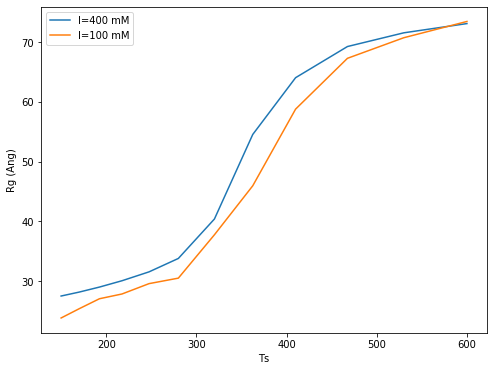

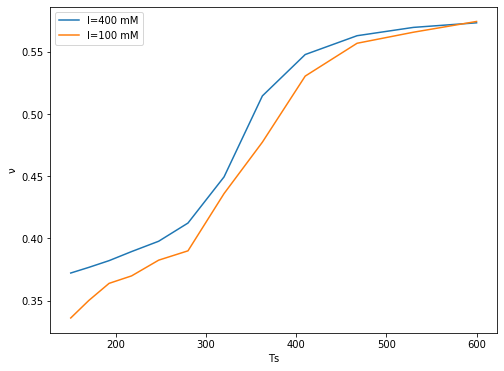

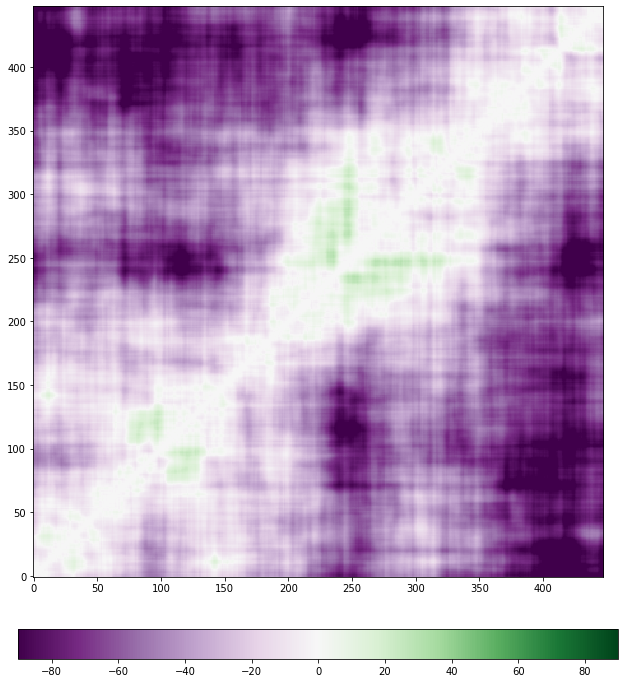

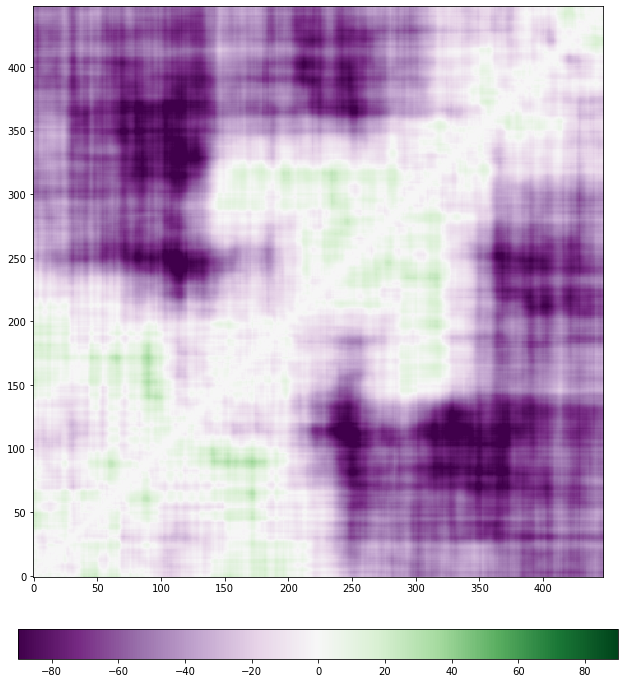

In [56]:
plt.figure(figsize=(8,6))
plt.xlabel('Ts')
plt.ylabel('Rg (Ang)')
plt.plot(Ts, rg10.mean(axis=1), label='I=400 mM')
plt.plot(Ts, rg100.mean(axis=1), label='I=100 mM')
plt.legend()

plt.figure(figsize=(8,6))
plt.xlabel('Ts')
plt.ylabel("ν")
plt.plot(Ts, flory10[0], label='I=400 mM')
plt.plot(Ts, flory100[0], label='I=100 mM')
plt.legend()


# fig = plt.figure(num=None, figsize=(16, 12), frameon=False)
# ax = plt.gca()
# img = ax.imshow(contacts10[4], cmap='PRGn')
# fig.subplots_adjust(left=0, right=1)
# ax.invert_yaxis()


fig = plt.figure(num=None, figsize=(16, 12), frameon=False)
ax = plt.gca()
img = ax.imshow((contacts100[5]-contacts10[5])*10, cmap='PRGn')
fig.subplots_adjust(left=0, right=1)
ax.invert_yaxis()
cb = plt.colorbar(img, orientation='horizontal', fraction=0.046, pad=0.08)
img.set_clim(-90, +90)



fig = plt.figure(num=None, figsize=(16, 12), frameon=False)
ax = plt.gca()
img = ax.imshow((contacts100[6]-contacts10[6])*10, cmap='PRGn')
fig.subplots_adjust(left=0, right=1)
ax.invert_yaxis()
cb = plt.colorbar(img, orientation='horizontal', fraction=0.046, pad=0.08)
img.set_clim(-90, +90)

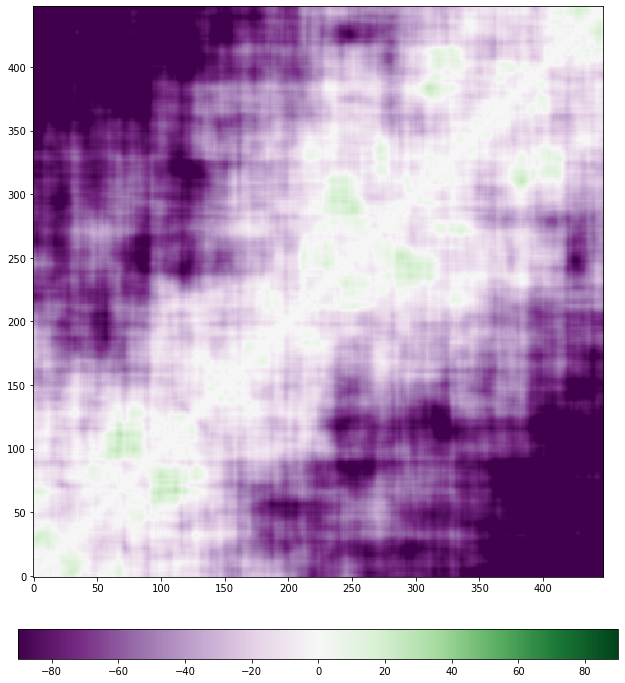

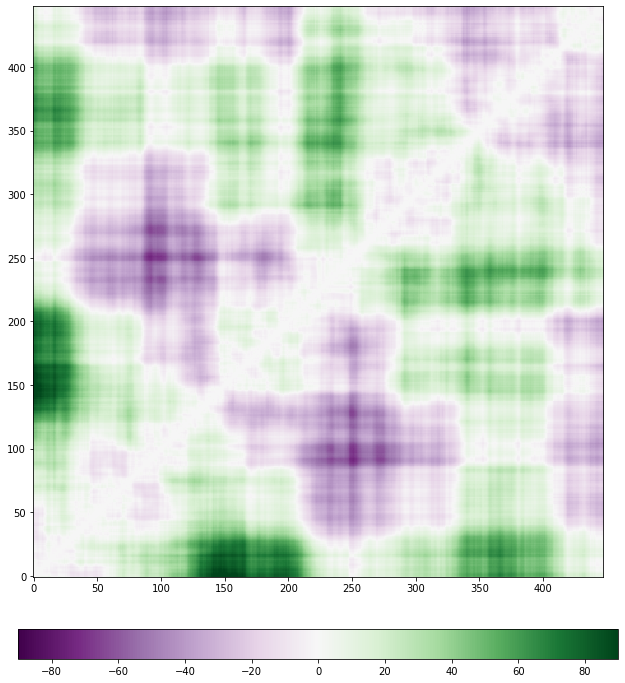

In [55]:
fig = plt.figure(num=None, figsize=(16, 12), frameon=False)
ax = plt.gca()
img = ax.imshow((contacts100[0]-contacts10[0])*10, cmap='PRGn')
fig.subplots_adjust(left=0, right=1)
ax.invert_yaxis()
cb = plt.colorbar(img, orientation='horizontal', fraction=0.046, pad=0.08)
img.set_clim(-90, +90)



fig = plt.figure(num=None, figsize=(16, 12), frameon=False)
ax = plt.gca()
img = ax.imshow((contacts100[-1]-contacts10[-1])*10, cmap='PRGn')
fig.subplots_adjust(left=0, right=1)
ax.invert_yaxis()
cb = plt.colorbar(img, orientation='horizontal', fraction=0.046, pad=0.08)
img.set_clim(-90, +90)

In [17]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis)

lscales = [0.55, 0.7, 0.85, 1.00]
Is = np.array([25, 400])*10**(-3)
I = 400 * 10**(-3)
d = '/home/adria/perdiux/prod/lammps/dignon/CPEB4/RE_I_CPEB4/400I'
cpeb4 = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
for ls in lscales:
    dr = os.path.join(d,f'{ls}l-CPEB4') 
    c2 = lmpsetup.LMPSetup(oliba_wd=dr, seq=cpeb4, temper=True)
    c2.temperatures = '150.0 170.0 192.5 217.5 247.5 280.0 320.0 362.5 410.0 467.5 530.0 600.0'
    c2.processors = 12
    c2.t = 100000000
    c2.hps_scale = ls
    c2.ionic_strength = I
#         c2.get_equilibration_xyz()
    c2.get_hps_params()
    c2.get_hps_pairs()
    c2.write_hps_files()

Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/RE_I_CPEB4/400I/0.55l-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/RE_I_CPEB4/400I/0.7l-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/RE_I_CPEB4/400I/0.85l-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/RE_I_CPEB4/400I/1.0l-CPEB4


The results are for I=100 :

Setup replica exchanges for CPEB4 at ionic strengths = [25, 100, 400] and lambda scales = [0.55, 0.7, 0.85, 1.00]

In [158]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis)

lscales = [0.55, 0.7, 0.85, 1.00]
Is = np.array([25, 100, 400])*10**(-3)
d = '/home/adria/test/I-CPEB4'
cpeb4 = 'MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE'
for ls in lscales:
    for I in Is:
        dr = os.path.join(d,f'{ls}l-{int(I*10**3)}I-CPEB4') 
        c2 = lmpsetup.LMPSetup(oliba_wd=dr, seq=cpeb4, temper=True)
        c2.temperatures = '150.0 170.0 192.5 217.5 247.5 280.0 320.0 362.5 410.0 467.5 530.0 600.0'
        c2.processors = 12
        c2.t = 100000000
        c2.hps_scale = ls
        c2.ionic_strength = I
#         c2.get_equilibration_xyz()
        c2.get_hps_params()
        c2.get_hps_pairs()
        c2.write_hps_files()

ε_r = 10 setup

In [161]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis)

lscales = [0.55, 0.7, 0.85, 1.00]
Is = np.array([10, 100])*10**(-3)
epsilon_r = 10
d = '/home/adria/perdiux/prod/lammps/dignon/CPEB4/eps'
for ls in lscales:
    for I in Is:
        dr = os.path.join(d,f'{ls}l-{int(I*10**3)}I-CPEB4') 
        c2 = lmpsetup.LMPSetup(oliba_wd=dr, seq=cpeb4, temper=True)
        c2.temperatures = '150.0 170.0 192.5 217.5 247.5 280.0 320.0 362.5 410.0 467.5 530.0 600.0'
        c2.processors = 12
        c2.t = 100000000
        c2.hps_scale = ls
        c2.ionic_strength = I
#         c2.get_equilibration_xyz()
        c2.get_hps_params()
        c2.get_hps_pairs()
        c2.write_hps_files()

Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/0.55l-10I-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/0.55l-100I-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/0.7l-10I-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/0.7l-100I-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/0.85l-10I-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/0.85l-100I-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/1.0l-10I-CPEB4
Directory does not exist. Creating dir : /home/adria/perdiux/prod/lammps/dignon/CPEB4/eps/1.0l-100I-CPEB4


In [51]:
Ts[4]

247.5

In [52]:
Ts[5]

280.0

In [53]:
Ts[6]

320.0